In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import glob
import scipy.stats as st
import datetime as dt
from datetime import datetime
import matplotlib.dates as mdates

# Study data files
pm25_data_path = "../Resources/aqi.csv"
ozone_data_path = "../Resources/ozone.csv"
#Traffic_Data = "data/MNDOT.csv"

# Read the PM2.5 data and the Ozone Data
pm25_data = pd.read_csv(pm25_data_path)
ozone_data = pd.read_csv(ozone_data_path)

#Combine all AQI files
Combined_AQI_csv=pd.merge(pm25_data,ozone_data,on="Date",how="inner")
#Export to CSV
Combined_AQI_csv.to_csv( "../Resources/Combined_AQI_csv.csv", index=False)
Combined_AQI_csv.head()

,Date,Source_x,Site ID_x,POC_x,Daily Mean PM2.5 Concentration,UNITS_x,DAILY_AQI_VALUE_x,Site Name_x,DAILY_OBS_COUNT_x,PERCENT_COMPLETE_x,...,STATE_CODE_y,STATE_y,COUNTY_CODE_y,COUNTY_y,SITE_LATITUDE_y,SITE_LONGITUDE_y,day_y,month_y,year_y,unix_y
0,3/18/15,AQS,270530962,3,9.4,ug/m3 LC,39,Near Road I-35/I-94,1,100,...,27.0,Minnesota,53.0,Hennepin,44.965242,-93.254759,18,3,2015,1426636800
1,3/19/15,AQS,270530962,3,9.9,ug/m3 LC,41,Near Road I-35/I-94,1,100,...,27.0,Minnesota,53.0,Hennepin,44.965242,-93.254759,19,3,2015,1426723200
2,3/20/15,AQS,270530962,3,12.3,ug/m3 LC,51,Near Road I-35/I-94,1,100,...,27.0,Minnesota,53.0,Hennepin,44.965242,-93.254759,20,3,2015,1426809600
3,3/21/15,AQS,270530962,3,5.3,ug/m3 LC,22,Near Road I-35/I-94,1,100,...,27.0,Minnesota,53.0,Hennepin,44.965242,-93.254759,21,3,2015,1426896000
4,3/22/15,AQS,270530962,3,7.2,ug/m3 LC,30,Near Road I-35/I-94,1,100,...,27.0,Minnesota,53.0,Hennepin,44.965242,-93.254759,22,3,2015,1426982400


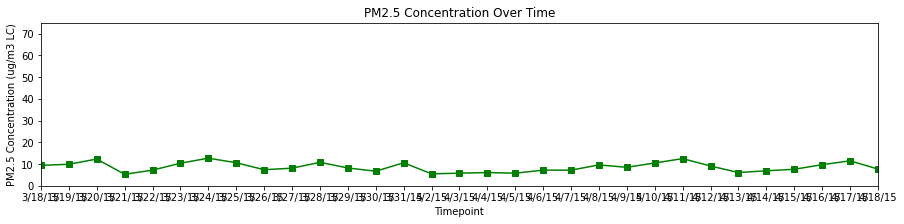

In [24]:
#Create plot tracking AQI change over time
x_axis=Combined_AQI_csv["Date"]
y_axis=Combined_AQI_csv["Daily Mean PM2.5 Concentration"]
plt.figure(figsize=(15,3))
plt.plot(x_axis,y_axis,marker='s',color="g")
plt.title("PM2.5 Concentration Over Time")
plt.xlabel("Timepoint")
plt.ylabel("PM2.5 Concentration (ug/m3 LC)")

#PM2.5 Concentration Limits
plt.ylim(0,75)
#Date Limits
plt.xlim(0,30)

#Print
plt.show()

In [ ]:
# #Combined_AQI_csv["Date"]= dt.datetime(Combined_AQI_csv["Date"],"%b/%d/%Y")
# Combined_AQI_csv['Date'] = pd.to_datetime(Combined_AQI_csv.Date)
# Combined_AQI_csv['Date'] = Combined_AQI_csv['Date'].dt.strftime('%m/%d/%Y')

# #Week_DF = Combined_AQI_csv
# #Week_DF['Week'] = pd.to_datetime(Week_DF['Date']) - pd.to_timedelta(7, unit='d')
# #Week_DF = Week_DF.groupby(['Date', pd.Grouper(key='Date', freq='W-MON')])['Daily Mean PM2.5 Concentration'].sum().reset_index().sort_values('Date')
    
# Combined_AQI_csv["week"]=Combined_AQI_csv["Date"].dt.strftime("%V")    

#Combined_AQI_csv["week"]=Combined_AQI_csv["Date"].dt.week

#Week_DF = Combined_AQI_csv.groupby(pd.Grouper(key="Date",freq="1W")).mean()["Daily Mean PM2.5 Concentration"]
#Week_DF

In [29]:
# Calculate the correlation coefficient and linear regression model 
# Based on PM2.5 over Time

PM25 = Combined_AQI_csv["Daily Mean PM2.5 Concentration"]

plt.figure(figsize=(20,5))
# Regression
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(Combined_AQI_csv.index, PM25)
regress_values = Combined_AQI_csv.index * m_slope + m_int
plt.plot(Combined_AQI_csv.index,regress_values,"r-")

# scatterplot (comment out everything except first dates line for regress to work, but then the dates won't work)
ax = plt.gca()
dates = Combined_AQI_csv['Date']
dates = [datetime.strptime(d, "%m/%d/%Y") for d in dates]
datetime.datetime(2012,04,01,0,0).strftime('%s')
ax.set_xlim([dates[0], dates[-1]])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(3,6,9), bymonthday=-1))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

plt.scatter(dates, PM25, marker="^", facecolors="xkcd:gray", edgecolors="black")
plt.title("PM2.5 Regression Analysis")
plt.xlabel("Time")
plt.ylabel("PM2.5 Concentration (ug/m3 LC)")
plt.show()


#Correlation Coefficient
#W=Combined_AQI_csv["Date"]
#A=Combined_AQI_csv["Daily Mean PM2.5 Concentration"]

TypeError: strptime() argument 1 must be str, not int